# 仿射变换

In [4]:
import cv2
import glob
import numpy as np
import matplotlib.pyplot as plt

def affine_transform(theta, tx, ty):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    T = np.array([[cos_theta, -sin_theta, tx],
                  [sin_theta, cos_theta, ty],
                  [0, 0, 1]])

    return T

# 读取图像
image = cv2.imread(f'./photos/photo0.jpg')
image = cv2.resize(image,(900,900))

# 定义旋转角度和平移向量
rotation_angle = np.radians(np.pi * 0.25)
translation_vector = np.array([500,0])  # 举例的平移向量

# 获取仿射变换矩阵
T = affine_transform(rotation_angle, *translation_vector)

# 应用仿射变换
rows, cols, _ = image.shape
transformed_image = cv2.warpAffine(image, T[:2, :], (cols, rows))

# 显示原始图像和变换后的图像
# plt.s

# 标定相机内参

In [2]:
# 标定相机内参
import glob
import numpy as np
import cv2

# 棋盘格的尺寸（内角点之间的距离）
square_size = 100  # 单位：毫米

# 棋盘格的行和列数
pattern_size = (9,6)

# 存储棋盘格角点的数组
obj_points = []
img_points = []

# 生成棋盘格中的理论角点坐标
objp = np.zeros((pattern_size[0] * pattern_size[1], 3), np.float32)
objp[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2) * square_size

# 获取图像
images = glob.glob(f'./photos//photo*.jpg')
print(images)

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 查找棋盘格角点
    ret, corners = cv2.findChessboardCorners(gray, pattern_size, None)

    if ret:
        obj_points.append(objp)
        img_points.append(corners)

        # 在图像上绘制角点
        img = cv2.drawChessboardCorners(img, pattern_size, corners, ret)
        cv2.imshow(f"{fname}",img)

# cv2.waitKey(0)
# cv2.destroyAllWindows()

# 进行相机内参标定
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1], None, None)

# 打印相机内参
print("相机内参矩阵:")
print(mtx)
print("\n畸变系数:")
print(dist)




['./photos\\photo0.jpg', './photos\\photo1.jpg', './photos\\photo10.jpg', './photos\\photo11.jpg', './photos\\photo12.jpg', './photos\\photo13.jpg', './photos\\photo14.jpg', './photos\\photo15.jpg', './photos\\photo16.jpg', './photos\\photo17.jpg', './photos\\photo18.jpg', './photos\\photo19.jpg', './photos\\photo2.jpg', './photos\\photo20.jpg', './photos\\photo21.jpg', './photos\\photo22.jpg', './photos\\photo23.jpg', './photos\\photo24.jpg', './photos\\photo25.jpg', './photos\\photo26.jpg', './photos\\photo27.jpg', './photos\\photo3.jpg', './photos\\photo4.jpg', './photos\\photo5.jpg', './photos\\photo6.jpg', './photos\\photo7.jpg', './photos\\photo8.jpg', './photos\\photo9.jpg']
相机内参矩阵:
[[614.58492257   0.         285.93832281]
 [  0.         627.17530595 243.47507507]
 [  0.           0.           1.        ]]

畸变系数:
[[-0.01908289  0.5028662  -0.01322444 -0.00695192 -1.15783511]]


In [3]:
len(images)

28

In [4]:
len(img_points)

28

# 提取一张图像的世界坐标 P1 [x, y, z, 1] 与 像素坐标 P2 [u ,v ,1] ，从而计算外参

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import glob

focal_length_x, principal_point_x, focal_length_y, principal_point_y = 614.58492257      , 285.93832281, 627.17530595 , 243.47507507
mtx = np.array([[focal_length_x, 0, principal_point_x],
                [0, focal_length_y, principal_point_y],
                [0, 0, 1]], 
                dtype=np.float64)
k1, k2, p1, p2, k3 = -0.01908289,  0.5028662,  -0.0132244, -0.00695192, -1.15783511
dist = np.array([k1, k2, p1, p2, k3], dtype=np.float64)

# 棋盘格的尺寸（内角点之间的距离）
square_size = 100  # 单位：毫米
# 棋盘格的行和列数
pattern_size = (9,6)

path = 'photos/photo0.jpg'
# 生成棋盘格中的理论角点坐标
obj_point = np.zeros((pattern_size[0] * pattern_size[1], 3), np.float32)
obj_point[:, :2] = np.mgrid[0:pattern_size[0], 0:pattern_size[1]].T.reshape(-1, 2) * square_size
img = cv2.imread(path)
undistorted_img = cv2.undistort(img, mtx, dist)
_, undistorted_img_point = cv2.findChessboardCorners(undistorted_img, pattern_size)
_, img_point = cv2.findChessboardCorners(img, pattern_size)

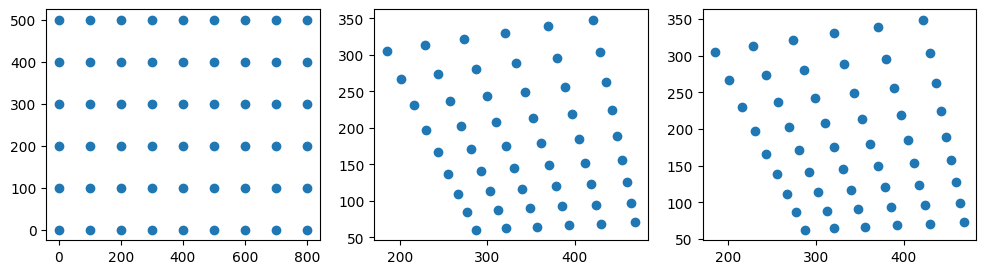

In [10]:
img_point = np.squeeze(img_point)
obj_points = np.squeeze(obj_point)
undistorted_img_point = np.squeeze(undistorted_img_point)
n_points = pattern_size[0] * pattern_size[1]
fig, axs = plt.subplots(1, 3, figsize=(12,3))
axs[0].scatter(obj_point[:n_points,0], obj_point[:n_points,1])
axs[1].scatter(img_point[:n_points,0], img_point[:n_points,1])
axs[2].scatter(undistorted_img_point[:n_points,0], undistorted_img_point[:n_points,1])
plt.show()

### R 9个参数 的计算 1

In [44]:
import numpy as np
from scipy.optimize import least_squares

# 已知的矩阵和向量
focal_length_x, principal_point_x, focal_length_y, principal_point_y = 614.58492257      , 285.93832281, 627.17530595 , 243.47507507
M1 = np.array([[focal_length_x, 0, principal_point_x],
                [0, focal_length_y, principal_point_y],
                [0, 0, 1]], 
                dtype=np.float64)

''' 
畸变参数
'''
k1, k2, p1, p2, k3 = -0.01908289,  0.5028662,  -0.0132244, -0.00695192, -1.15783511
dist = np.array([k1, k2, p1, p2, k3], dtype=np.float64)

import numpy as np
from scipy.optimize import least_squares

# 初始估计的 R 和 t
initial_R = np.eye(3)  # 初始估计为单位矩阵
initial_t = np.zeros((3, 1))  # 初始估计为零向量

P1_homo = np.hstack((img_point, np.ones((img_point.shape[0], 1))))
# 优化目标函数
def objective(params):
    # 提取旋转矩阵 R 和平移向量 t
    R = params[:9].reshape(3, 3)
    t = params[9:].reshape(3, 1)

    # 相机坐标转换
    camera_points = np.dot(R, obj_point.T).T + t.T

    # 投影到像素坐标系
    pixel_points_homogeneous = np.dot(M1, camera_points.T)
    pixel_points_homogeneous /= (pixel_points_homogeneous[2, :] ) + 1e-7

    # 计算残差
    residuals = (pixel_points_homogeneous[:, :].T - P1_homo).flatten()
    # residuals = (pixel_points_homogeneous[:2, :].T - img_point).flatten()
    # print(residuals)

    return residuals

# 将 R 和 t 展平，用于传递给 least_squares
initial_params = np.hstack((initial_R.flatten(), initial_t.flatten()))

# 使用 Levenberg-Marquardt 最小二乘法进行优化
result = least_squares(objective, initial_params, method='lm')

# 提取优化后的 R 和 t
optimized_R = result.x[:9].reshape(3, 3)
optimized_t = result.x[9:].reshape(3, 1)

print("优化后的 R:\n", optimized_R)
print("优化后的 t:\n", optimized_t)

优化后的 R:
 [[-3.47370342e-06 -1.51245053e-05  0.00000000e+00]
 [ 1.16364771e-05 -1.74033996e-06  0.00000000e+00]
 [-1.94996706e-20  1.48347849e-20  1.00000000e+00]]
优化后的 t:
 [[ 0.00719241]
 [-0.00630987]
 [ 0.02250469]]


#### 可视化结果

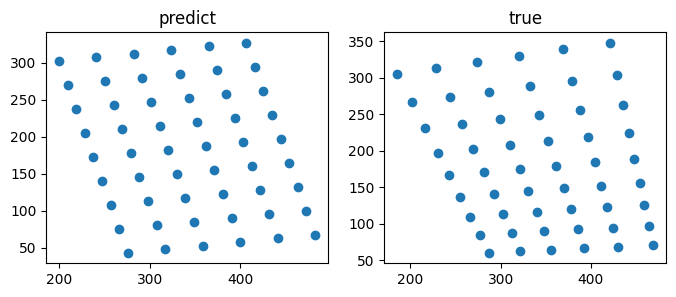

In [46]:
# 相机坐标转换
camera_points = np.dot(optimized_R, obj_point.T).T + optimized_t.T

# 投影到像素坐标系
P2_pred = np.dot(M1, camera_points.T).T
for i in range(len(P2_pred)):
    P2_pred[i][0] /= P2_pred[i][2]
    P2_pred[i][1] /= P2_pred[i][2]
fig, axs = plt.subplots(1, 2, figsize=(8,3))
axs[0].scatter(P2_pred[:,0],P2_pred[:,1])
axs[0].set_title('predict')
axs[1].scatter(img_point[:n_points,0], img_point[:n_points,1])
axs[1].set_title('true')
plt.show()

### R 9个参数 的计算 2

In [49]:
import numpy as np
from scipy.optimize import least_squares

# 已知的矩阵和向量
focal_length_x, principal_point_x, focal_length_y, principal_point_y = 614.58492257      , 285.93832281, 627.17530595 , 243.47507507
M1 = np.array([[focal_length_x, 0, principal_point_x],
                [0, focal_length_y, principal_point_y],
                [0, 0, 1]], 
                dtype=np.float64)

''' 
畸变参数
'''
k1, k2, p1, p2, k3 = -0.01908289,  0.5028662,  -0.0132244, -0.00695192, -1.15783511
dist = np.array([k1, k2, p1, p2, k3], dtype=np.float64)

import numpy as np
from scipy.optimize import least_squares

# 初始估计的 R 和 t
initial_R = np.zeros((3, 3))  # 初始估计为 0 矩阵
# initial_R = np.eye(3)
initial_t = np.zeros((3, 1))  # 初始估计为零向量

P1_homo = np.hstack((img_point, np.ones((img_point.shape[0], 1))))
# 优化目标函数
def objective(params):
    # 提取旋转矩阵 R 和平移向量 t
    R = params[:9].reshape(3, 3)
    t = params[9:].reshape(3, 1)

    # 相机坐标转换
    camera_points = np.dot(R, obj_point.T).T + t.T

    # 投影到像素坐标系
    pixel_points_homogeneous = np.dot(M1, camera_points.T)
    pixel_points_homogeneous /= (pixel_points_homogeneous[2, :] ) + 1

    # 计算残差
    residuals = (pixel_points_homogeneous[:, :].T - P1_homo).flatten()
    # print(residuals)

    return residuals

# 将 R 和 t 展平，用于传递给 least_squares
initial_params = np.hstack((initial_R.flatten(), initial_t.flatten()))

# 使用 Levenberg-Marquardt 最小二乘法进行优化
result = least_squares(objective, initial_params, method='lm')

# 提取优化后的 R 和 t
optimized_R = result.x[:9].reshape(3, 3)
optimized_t = result.x[9:].reshape(3, 1)

print("优化后的 R:\n", optimized_R)
print("优化后的 t:\n", optimized_t)

优化后的 R:
 [[-1.10135798 -3.84165476  0.        ]
 [ 3.22630072 -0.54026589  0.        ]
 [-2.09930132  1.08502159  0.        ]]
优化后的 t:
 [[ 1932.60447104]
 [-1778.75425501]
 [ 6476.57547412]]


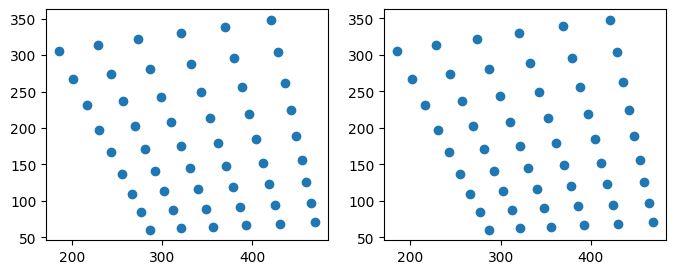

In [50]:
# 相机坐标转换
camera_points = np.dot(optimized_R, obj_point.T).T + optimized_t.T

# 投影到像素坐标系
P2_pred = np.dot(M1, camera_points.T).T
for i in range(len(P2_pred)):
    P2_pred[i][0] /= P2_pred[i][2]
    P2_pred[i][1] /= P2_pred[i][2]

fig, axs = plt.subplots(1, 2, figsize=(8,3))
axs[0].scatter(P2_pred[:,0],P2_pred[:,1])
axs[1].scatter(img_point[:n_points,0], img_point[:n_points,1])
plt.show()

In [171]:
import numpy as np
from scipy.optimize import least_squares

# 已知的矩阵和向量
focal_length_x, principal_point_x, focal_length_y, principal_point_y = 614.58492257      , 285.93832281, 627.17530595 , 243.47507507
M1 = np.array([[focal_length_x, 0, principal_point_x],
                [0, focal_length_y, principal_point_y],
                [0, 0, 1]], 
                dtype=np.float64)

''' 
畸变参数
'''
k1, k2, p1, p2, k3 = -0.01908289,  0.5028662,  -0.0132244, -0.00695192, -1.15783511
dist = np.array([k1, k2, p1, p2, k3], dtype=np.float64)

import numpy as np
from scipy.optimize import least_squares

# 初始估计的 R 和 t
initial_R = np.eye(3)  # 初始估计为单位矩阵
initial_t = np.zeros((3, 1))  # 初始估计为零向量

P1_homo = np.hstack((img_point, np.ones((img_point.shape[0], 1))))
# 优化目标函数
def objective(params):
    # 提取旋转矩阵 R 和平移向量 t
    R = params[:9].reshape(3, 3)
    t = params[9:].reshape(3, 1)

    R_t = np.hstack((R, t))
    print( M1.shape , R_t.shape , obj_point.shape)
    pixel_points_homogeneous = M1 @ R_t @ obj_point.T  # (3, 54) 54是角点的数目
    pixel_points_homogeneous /= (pixel_points_homogeneous[2, :] ) + 1e-7

    # 计算残差
    residuals = (pixel_points_homogeneous[:, :].T - P1_homo).flatten()
    # residuals = (pixel_points_homogeneous[:2, :].T - img_point).flatten()
    # print(residuals)

    return residuals

# 将 R 和 t 展平，用于传递给 least_squares
initial_params = np.hstack((initial_R.flatten(), initial_t.flatten()))

# 使用 Levenberg-Marquardt 最小二乘法进行优化
result = least_squares(objective, initial_params, method='lm')

# 提取优化后的 R 和 t
optimized_R = result.x[:9].reshape(3, 3)
optimized_t = result.x[9:].reshape(3, 1)

print("优化后的 R:\n", optimized_R)
print("优化后的 t:\n", optimized_t)

(3, 3) (3, 4) (54, 3)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 4)

### R 3个参数计算 1

In [4]:
import numpy as np
# from scipy.optimize import least_squares
from scipy.optimize import root

# 已知的矩阵和向量
focal_length_x, principal_point_x, focal_length_y, principal_point_y = 614.58492257      , 285.93832281, 627.17530595 , 243.47507507
M1 = np.array([[focal_length_x, 0, principal_point_x],
                [0, focal_length_y, principal_point_y],
                [0, 0, 1]], 
                dtype=np.float64)

def rotation_mtx(theta, axis = None):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    if axis == 'z':
        return np.array([[cos_theta, -sin_theta, 0],
                  [sin_theta, cos_theta, 0],
                  [0, 0, 1]])
    elif axis == 'y':
        return np.array([[cos_theta, 0, sin_theta],
                  [0, 1, 0],
                  [-sin_theta, 0, cos_theta]])
    elif axis == 'x':
        return np.array([[1, 0, 0],
                  [0, cos_theta, -sin_theta],
                  [0, sin_theta, cos_theta]])

    return None


# 定义目标函数
def objective(params=None):
    # 从参数中提取旋转矩阵R和平移向量t
    if Rodrigues:
        print('Rodrigues')
        Rv = params[:3].reshape(-1, 1)
        R,_ = cv2.Rodrigues(Rv)
    else:
        Rx, Ry, Rz = rotation_mtx(params[0], 'x'),rotation_mtx(params[1], 'y'),rotation_mtx(params[2], 'z')
        R = Rx @ Ry @ Rz
    t = params[3:].reshape(-1, 1)
    # 计算P2 预测值
    R_t = np.hstack((R, t))
    P2_pred = M1 @ R_t @ P1  # (3, 54) 54是角点的数目
    # print(P2_pred.shape)
    P2_pred /= (P2_pred[2,:]) + 1

    # 计算残差
    residuals = (P2 - P2_pred )

    # 返回残差
    return residuals.T.flatten()

from scipy.optimize import least_squares
# 初始化参数
Rotation_mtx_n = 3
initial_params = np.zeros(Rotation_mtx_n + 3)  # 旋转矩阵R(3个参数) + 平移向量t(3个参数) 
Rodrigues = 0

P1 = np.hstack((obj_point,np.ones((obj_point.shape[0], 1)))).T
P2 = np.squeeze(img_point)
# 把 P2也统一为齐次坐标
P2 = np.hstack((P2, np.ones((P2.shape[0],1)))).T
# 使用 least_squares 的 LM 算法 进行优化
result = least_squares(objective, initial_params, method='lm')

# 输出优化结果
optimized_params = result.x
R_optimized = optimized_params[:Rotation_mtx_n].reshape(-1,1)
t_optimized = optimized_params[Rotation_mtx_n:].reshape(-1, 1)

print("Optimized Rotation Matrix R:")
print(R_optimized)
print("Optimized Translation Vector t:")
print(t_optimized)

Optimized Rotation Matrix R:
[[-0.63195397]
 [ 0.15606969]
 [ 1.85168541]]
Optimized Translation Vector t:
[[ 478.77668588]
 [-441.11075362]
 [1605.77248075]]


(3, 54)


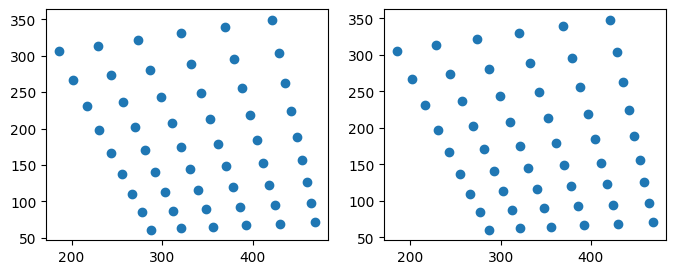

In [8]:
# 验证一下转换的效果
# 计算P2 预测值
R_optimized = np.squeeze(R_optimized)
if Rodrigues:
    print('Rodrigues')
    Rv = R_optimized[:3].reshape(-1, 1)
    R,_ = cv2.Rodrigues(Rv)
else:
    Rx, Ry, Rz = rotation_mtx(R_optimized[0], 'x'),rotation_mtx(R_optimized[1], 'y'),rotation_mtx(R_optimized[2], 'z')
    R = Rx @ Ry @ Rz
R_t = np.hstack((R, t_optimized))
P2_pred = M1 @ R_t @ P1  # (3, 54) 54是角点的数目
P2_pred = P2_pred
print(P2_pred.shape)
P2_pred /= (P2_pred[2,:])
''' 等价于下面的形式 '''
# for i in range(len(P2_pred[0])):
#         P2_pred[0][i] /= P2_pred[2][i] +1
#         P2_pred[1][i] /= P2_pred[2][i] +1
#         P2_pred[2][i] = 1
fig, axs = plt.subplots(1, 2, figsize=(8,3))
axs[0].scatter(P2_pred[0,:],P2_pred[1,:])
axs[1].scatter(img_point[:n_points,0], img_point[:n_points,1])
plt.show()

### R 3个参数计算 2

In [15]:
import numpy as np
from scipy.optimize import least_squares

# 已知的矩阵和向量
focal_length_x, principal_point_x, focal_length_y, principal_point_y = 614.58492257      , 285.93832281, 627.17530595 , 243.47507507
M1 = np.array([[focal_length_x, 0, principal_point_x],
                [0, focal_length_y, principal_point_y],
                [0, 0, 1]], 
                dtype=np.float64)
''' 
畸变参数
'''
k1, k2, p1, p2, k3 = -0.01908289,  0.5028662,  -0.0132244, -0.00695192, -1.15783511
dist = np.array([k1, k2, p1, p2, k3], dtype=np.float64)

import numpy as np
from scipy.optimize import least_squares

# 初始估计的 R 和 t
initial_R = np.zeros(3)  # 初始估计为 0 向量
# initial_R = np.eye(3)
initial_t = np.zeros((3, 1))  # 初始估计为零向量

P1_homo = np.hstack((img_point, np.ones((img_point.shape[0], 1))))
# 优化目标函数
def objective(params):
    # 提取旋转矩阵 R 和平移向量 t
    # R = params[:9].reshape(3, 3)
    Rv = params[:3].reshape(-1, 1)
    R,_ = cv2.Rodrigues(Rv)
    t = params[3:].reshape(3, 1)

    # 相机坐标转换
    camera_points = np.dot(R, obj_point.T).T + t.T

    # 投影到像素坐标系
    pixel_points_homogeneous = np.dot(M1, camera_points.T)
    # print(pixel_points_homogeneous.shape)----(3, 54)
    pixel_points_homogeneous /= (pixel_points_homogeneous[2, :] ) + 1

    # 计算残差
    residuals = (pixel_points_homogeneous[:, :].T - P1_homo).flatten()
    # print(residuals)

    return residuals

# 将 R 和 t 展平，用于传递给 least_squares
initial_params = np.hstack((initial_R.flatten(), initial_t.flatten()))
print(initial_params)

# 使用 Levenberg-Marquardt 最小二乘法进行优化
result = least_squares(objective, initial_params, method='lm')

# 提取优化后的 R 和 t
# optimized_R = result.x[:9].reshape(3, 3)
optimized_R = result.x[:3].reshape(3, 1)
optimized_t = result.x[3:].reshape(3, 1)

print("优化后的 R:\n", optimized_R)
print("优化后的 t:\n", optimized_t)

[0. 0. 0. 0. 0. 0.]
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 54)
(3, 

In [11]:
R,_ = optimized_R
t = optimized_t
R_t = np.hstack((R,t))
P1_homo = np.hstack((obj_point, np.ones((obj_point.shape[0],1))))
P2_pred_cv2 = M1 @ R_t @ P1_homo.T  # (3, 54) 54是角点的数目
P2_pred = P2_pred_cv2.T
# P2_pred /= (P2_pred[:,2])
for i in range(len(P2_pred)):
    P2_pred[i][0] /= P2_pred[i][2]
    P2_pred[i][1] /= P2_pred[i][2]
plt.scatter(P2_pred[:,0],P2_pred[:,1])

ValueError: too many values to unpack (expected 2)

### 正确的结果

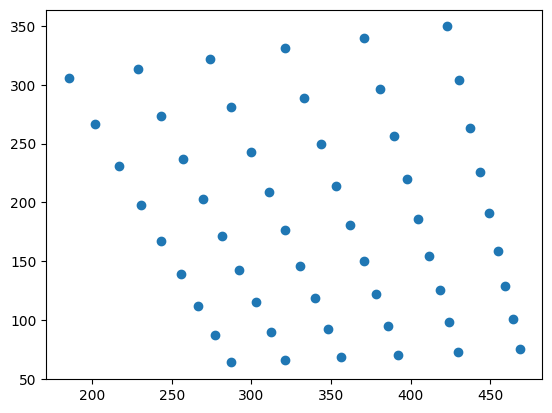

In [166]:
R,_ = cv2.Rodrigues( np.array([[-0.32175744],
        [ 0.68734474],
        [ 1.72705302]]))
t = np.array([[ 478.92737072],
        [-432.76674263],
        [1613.39348158]])
R_t = np.hstack((R,t))
P1_homo = np.hstack((obj_point, np.ones((obj_point.shape[0],1))))
P2_pred_cv2 = M1 @ R_t @ P1_homo.T  # (3, 54) 54是角点的数目
P2_pred = P2_pred_cv2.T
# P2_pred /= (P2_pred[:,2])
for i in range(len(P2_pred)):
    P2_pred[i][0] /= P2_pred[i][2]
    P2_pred[i][1] /= P2_pred[i][2]
plt.scatter(P2_pred[:,0],P2_pred[:,1])

## 实验一下 LM可行不可行
实验证明是可以的，那为什么上面算外参的就不行呢？
ANS: 计算像素坐标时没有除以z坐标,即 P2_pred /= P2_pred[2,:]

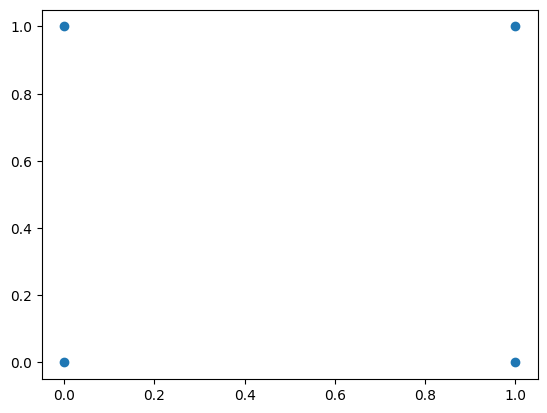

array([[0, 1, 0, 1],
       [0, 0, 1, 1]])

In [18]:
point = (np.mgrid[:2,:2].T.reshape(-1,2)).T
plt.scatter(point[0,:], point[1,:])
plt.show()
point

##### 一个参数

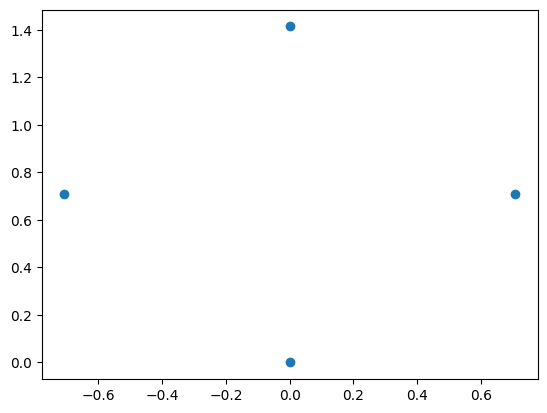

In [19]:
theta = 0.25 * np.pi
param = 0
def R(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    A = np.array([[cos_theta, -sin_theta],
                [sin_theta, cos_theta]
                ])
    return A

new_point = R(theta) @ point
plt.scatter(new_point[0, :], new_point[1, :])

In [75]:
theta = 0.35 * np.pi
param = np.array([0])
def R(theta):
    cos_theta = np.cos(theta)
    sin_theta = np.sin(theta)

    A = np.array([[cos_theta, -sin_theta],
                [sin_theta, cos_theta]
                ])
    return A

Point_true = R(theta) @ point

def objective(param):
    R_pred = R(param[0])
    Point_pred = R_pred @ point
    return (Point_true - Point_pred).flatten()

result = root(objective, param, method='lm')
result.x/np.pi

array([0.35])

##### 3个参数

In [30]:
point.T

array([[0, 0],
       [1, 0],
       [0, 1],
       [1, 1]])

In [43]:
point_3d = np.hstack((point.T, np.ones((point.shape[1],1))))
point_3d.T

array([[0., 1., 0., 1.],
       [0., 0., 1., 1.],
       [1., 1., 1., 1.]])

In [44]:
rvec_true = np.array([[-0.32175744],
        [ 0.68734474],
        [ 1.72705302]])
Point_true = cv2.Rodrigues(rvec_true)[0] @ point_3d.T
Point_true

array([[ 0.14173219, -0.13058032, -0.80998095, -1.08229345],
       [ 0.59926185,  1.38809809,  0.46279712,  1.25163336],
       [ 0.78790686,  0.23692294,  1.06289684,  0.51191292]])

In [68]:
rvec_true = np.array([[-0.32175744],
        [ 0.68734474],
        [ 1.72705302]])
Point_true = cv2.Rodrigues(rvec_true)[0] @ point_3d.T

rvec_param = np.array([0.,0.,0.]).reshape(-1,1)
def objective(param):
    R_pred,_ = cv2.Rodrigues(param)
    # print(R_pred.shape,point_3d.T.shape)
    Point_pred = R_pred @ (point_3d.T)
    return (Point_true - Point_pred).flatten()

result = root(objective, rvec_param, method='lm')
result.x

array([-0.32175744,  0.68734474,  1.72705302])

# 与OpenCV计算的内外参 进行对比

In [28]:
P1 = np.squeeze(obj_point)
P2 = np.squeeze(img_point)
# 默认使用 cv2.SOLVEPNP_ITERATIVE 方法
ret, rvec, tvec = cv2.solvePnP(P1, P2, mtx, dist, flags=cv2.SOLVEPNP_ITERATIVE)
rvec, tvec
# cv2.Rodrigues(rvec)[0], tvec
# len(img_points)

(array([[-0.30875434],
        [ 0.68396816],
        [ 1.72825717]]),
 array([[ 478.66033277],
        [-437.13791101],
        [1610.18174689]]))